# Learning Curves

Leranining curves are used to see whether a model is learning well and whther the parameter eta is adatped. We can visualised those curves by drawing the error evolution accross iterations 

## Data

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor 
from sklearn.datasets import make_regression

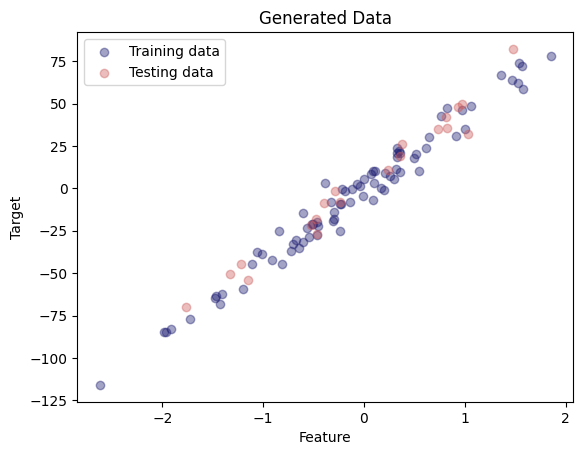

In [12]:
# Data generation 
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=7.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data visualization
plt.scatter(X_train, y_train, color='midnightblue', label='Training data', alpha=0.4)
plt.scatter(X_test, y_test, color='indianred', label='Testing data', alpha=0.4)
plt.title('Generated Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


## Function to train the model and draw learning curves

In [13]:
def train_model(learning_rate):
    plt.figure(figsize=(10, 6))
    
    sdg = SGDRegressor(
        loss='squared_error',
        penalty='l2',
        alpha=0.0001,
        learning_rate='invscaling',
        eta0=learning_rate,
        power_t=0.25
    )
    
    n_samples = X_train.shape[0]
    batch_size = 1 
    n_iterations = 10 
    
    # Historical losses
    loss_history_train = []
    loss_history_test = []
    
    for iteration in range(n_iterations):
        # Mix index foor this iteration
        indices = np.random.permutation(n_samples)
        
        # Mini-batch training
        for start in range(0, n_samples, batch_size):
            batch_idx = indices[start:start + batch_size]
            X_batch = X_train[batch_idx]
            y_batch = y_train[batch_idx]
            
            # Update weights with partial_fit
            sdg.partial_fit(X_batch, y_batch)
            
        # Calculate and store training loss
        y_train_pred = sdg.predict(X_train)
        train_loss = np.mean((y_train - y_train_pred) ** 2)
        loss_history_train.append(train_loss)
        
        # Calculate and store testing loss
        y_test_pred = sdg.predict(X_test)
        test_loss = np.mean((y_test - y_test_pred) ** 2)
        loss_history_test.append(test_loss)
    
    # Plot current model
    plt.plot(range(1, n_iterations + 1), loss_history_train, marker='o', label='Training Loss', color='midnightblue')  
    plt.plot(range(1, n_iterations + 1), loss_history_test, marker='s', label='Testing Loss', color='goldenrod')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curves (Learning Rate: {learning_rate})')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # return final model
    return sdg

In [14]:
def plot_predictions(model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='midnightblue', label='Training data', alpha=0.4)
    plt.scatter(X_test, y_test, color='goldenrod', label='Testing data', alpha=0.4)
    
    # Plot model predictions
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    
    plt.plot(X_range, y_pred, color='green', linewidth=2, label='Model Prediction')
    plt.title('Model Predictions')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

## Model with learning rate = 0.0001

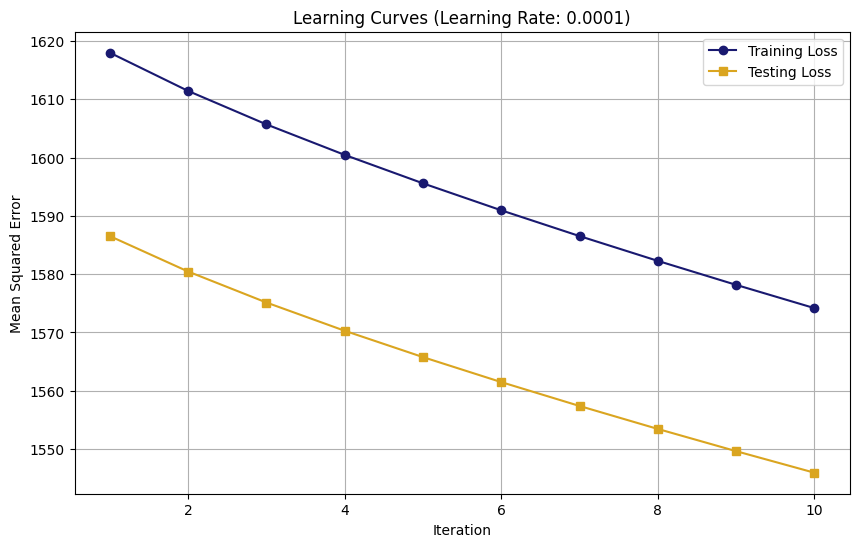

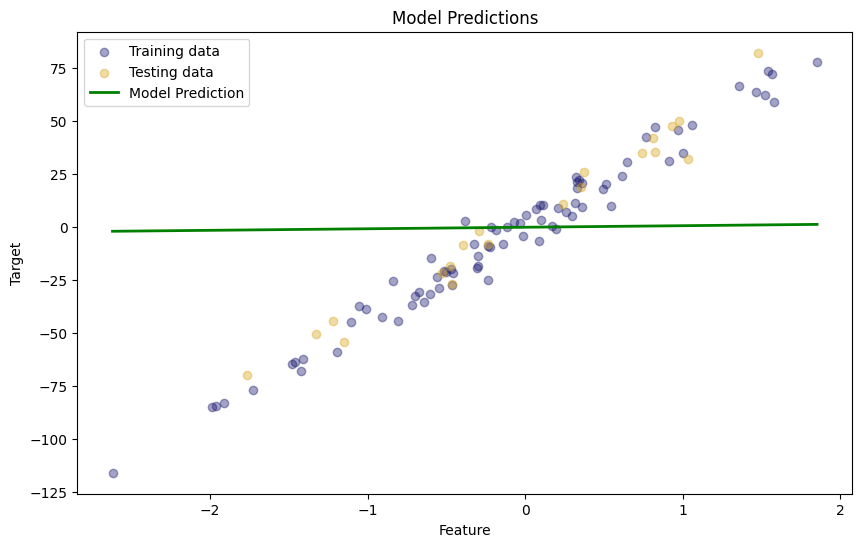

In [15]:
learning_rate = 0.0001

model = train_model(learning_rate)
plot_predictions(model)

## Model with learning rate = 0.001

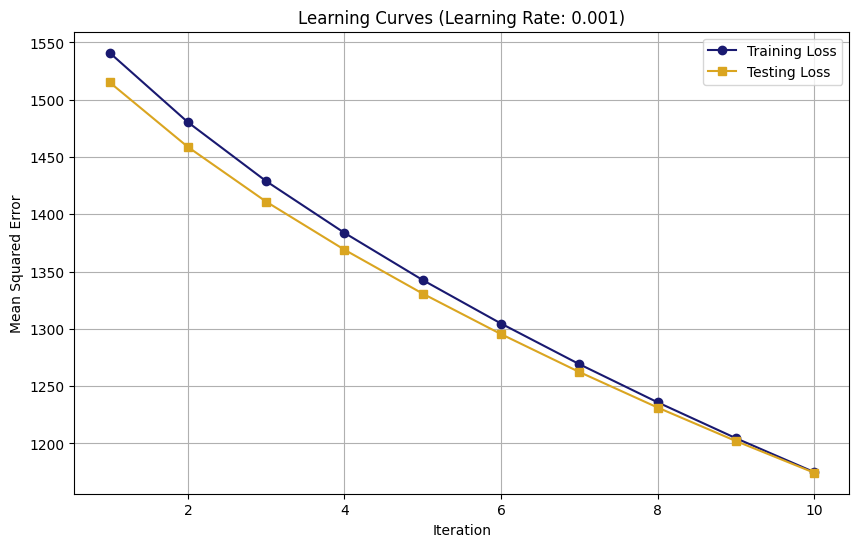

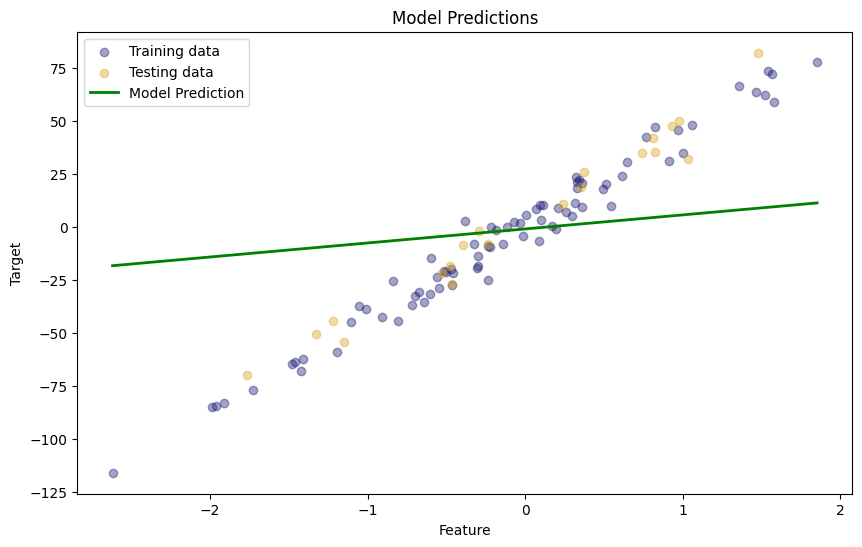

In [16]:
learning_rate = 0.001

model = train_model(learning_rate)
plot_predictions(model)

## Model with learning rate = 0.01

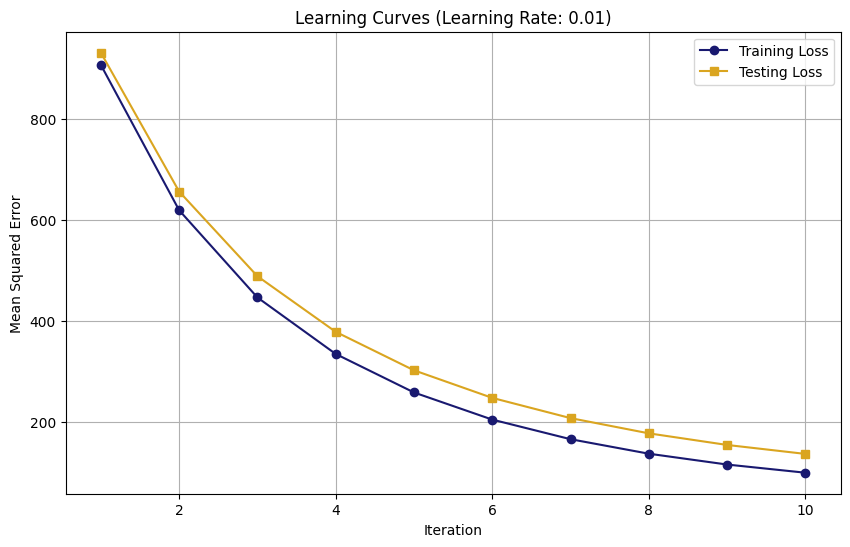

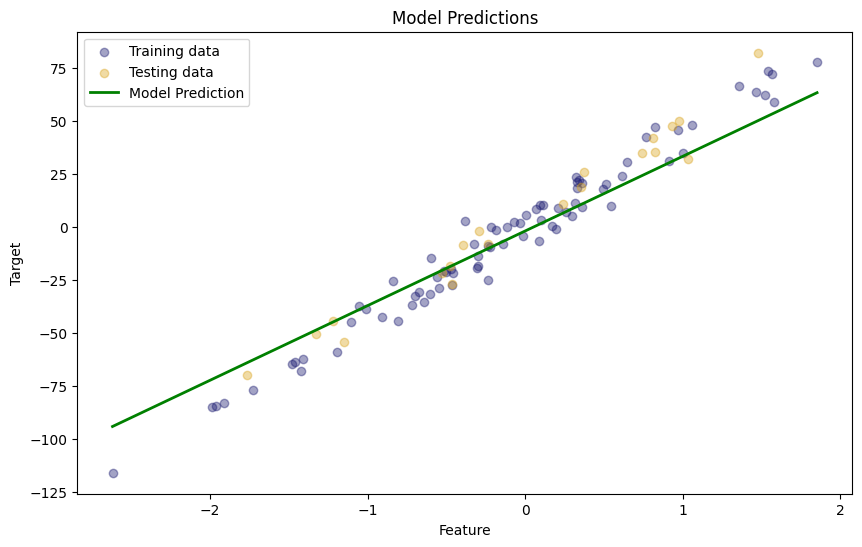

In [17]:
learning_rate = 0.01

model = train_model(learning_rate)
plot_predictions(model)

## Model with learning rate = 0.01

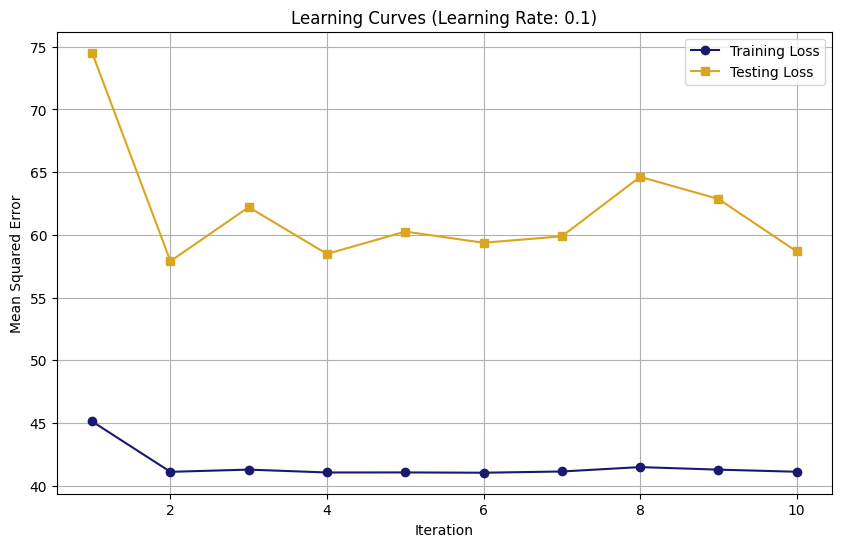

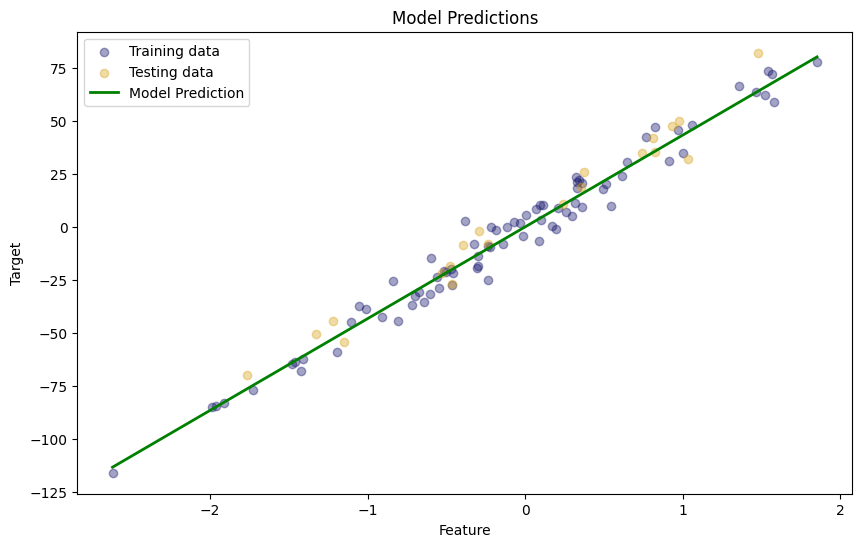

In [18]:
learning_rate = 0.1

model = train_model(learning_rate)
plot_predictions(model)

# And now?

Thanks to learning curves, we are now able to see that we should use a learning rate between 0.1 and 0.01. Thus, we can test the model with intermediary value such as 0.03, 0.06, ...

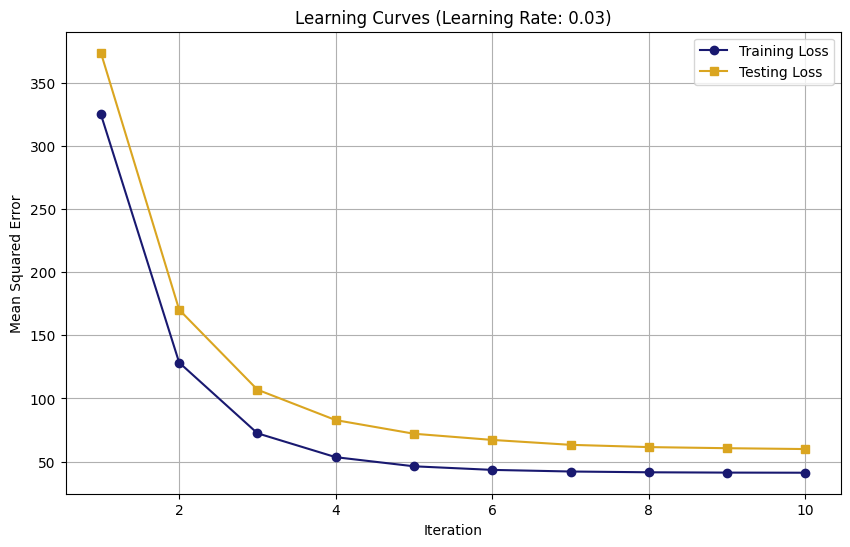

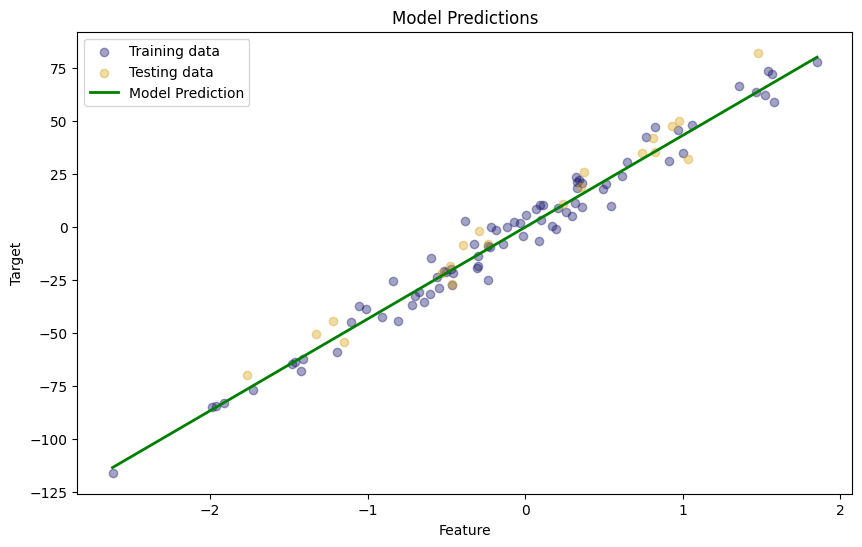

In [19]:
learning_rate = 0.03
model = train_model(learning_rate)
plot_predictions(model)

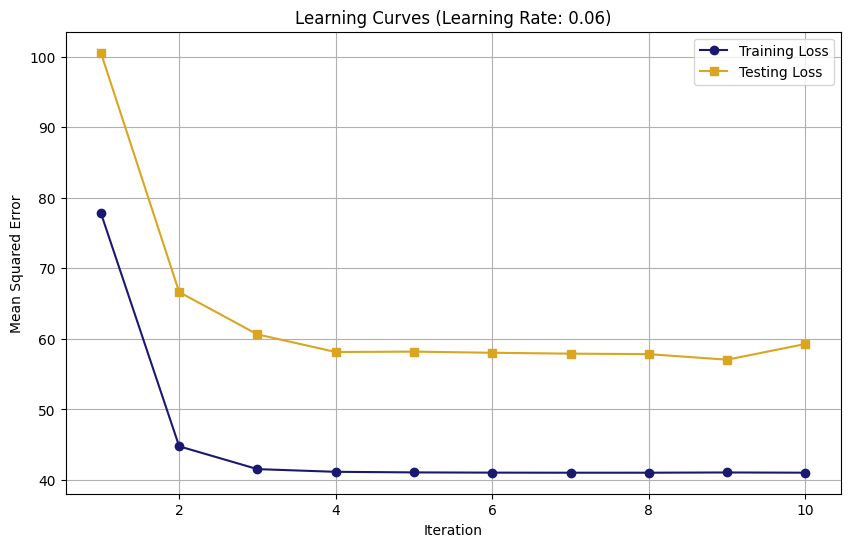

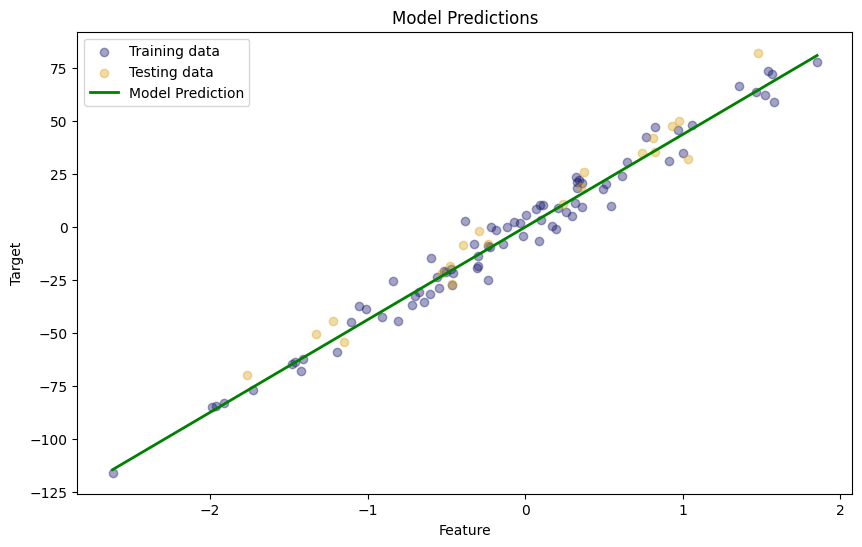

In [20]:
learning_rate = 0.06
model = train_model(learning_rate)
plot_predictions(model)